In [220]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
sns.set()

In [221]:
dfs = pd.read_csv('CElegansDataforQuan/data109.csv')
file_names = ['data137.csv','data153.csv','data182.csv','data184.csv','data185.csv','data714.csv']
data_seizes = [dfs.shape[0]]
for i in file_names:
    file_name = 'CElegansDataforQuan/' + i
    df = pd.read_csv(file_name).drop(columns = 'dataset')
    data_seizes.append(df.shape[0])
    dfs = pd.concat([dfs, df], ignore_index=True) 
data_seizes

[2719, 1294, 1325, 2977, 3000, 2976, 2472]

In [222]:
dfs

,AS10,AS11,CA08,CA09,CP08,CP09,DA07,DB07,DD06,DVA,...,VA12,VB11,VD11,VD12,VD13,Velocity,dataset,int9R,pos_x,pos_y
0,NaN,0.876847,0.277588,0.073233,NaN,NaN,0.063833,0.114236,7.090610,2.808013,...,10.445766,-0.036840,-0.098348,0.007007,NaN,0.253924,1.0,0.153831,NaN,NaN
1,NaN,0.941252,0.043113,1.049761,NaN,NaN,2.228109,1.862388,7.387311,2.804547,...,10.454087,6.688519,0.776405,0.039938,NaN,0.501912,1.0,1.770940,NaN,NaN
2,NaN,0.937533,0.060851,1.027925,NaN,NaN,2.275526,1.865038,7.686936,2.815283,...,10.497043,6.809028,0.820852,0.038059,NaN,0.733739,1.0,1.763235,NaN,NaN
3,NaN,0.949898,0.063540,1.031033,NaN,NaN,2.353936,1.881986,7.991669,2.782603,...,10.609654,6.939984,0.845042,0.038140,NaN,0.936781,1.0,1.749144,NaN,NaN
4,NaN,0.945841,0.067606,1.037897,NaN,NaN,2.449252,1.904581,8.298940,2.749007,...,10.734771,7.098588,0.874689,0.038541,NaN,1.095309,1.0,1.734982,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16758,0.006512,0.141999,18.982660,16.334646,-0.071363,NaN,0.129352,-0.066791,0.128827,0.736368,...,0.641444,1.221440,0.032942,0.036639,0.145769,-0.006109,NaN,-0.177658,646.075826,78.071775
16759,0.032841,0.105154,19.681431,16.831984,-0.059954,NaN,0.143283,-0.056378,0.165767,0.712397,...,0.644962,0.809530,0.014267,0.019662,0.182411,-0.010564,NaN,-0.233071,645.502876,78.120112
16760,0.068266,0.067884,20.406346,17.282769,-0.049565,NaN,0.158047,-0.042165,0.204427,0.691274,...,0.644641,0.389569,-0.003248,-0.007459,0.213648,-0.013294,NaN,-0.281393,639.160515,78.650078
16761,0.105192,0.030678,21.158898,17.693125,-0.034893,NaN,0.172152,-0.021964,0.244549,0.670190,...,0.644882,0.057919,-0.016128,-0.035571,0.239300,-0.013034,NaN,-0.327530,632.774759,79.174350


In [223]:
dfs.columns

Index(['AS10', 'AS11', 'CA08', 'CA09', 'CP08', 'CP09', 'DA07', 'DB07', 'DD06',
       'DVA', 'DVB', 'DX1', 'DX2', 'EF1', 'EF2', 'EF3', 'HOA', 'HOB',
       'Lto1tip', 'LtoTips', 'LtoVul', 'PCAL', 'PCBL', 'PCCL', 'PDB', 'PDC',
       'PGA', 'PHAL', 'PHBL', 'PHCL', 'PHDL', 'PLML', 'PVPL', 'PVPR', 'PVT',
       'PVV', 'PVX', 'PVY', 'PVZ', 'PostSperm', 'R1AL', 'R1BL', 'R2AL', 'R2BL',
       'R3AL', 'R4AL', 'R6AL', 'R8BL', 'R9BL', 'Rel.Speed', 'Rel.Velocity',
       'SPCL', 'SPDL', 'SPVL', 'Speed', 'Spicules', 'TailAngle', 'VA10',
       'VA11', 'VA12', 'VB11', 'VD11', 'VD12', 'VD13', 'Velocity', 'dataset',
       'int9R', 'pos_x', 'pos_y'],
      dtype='object')

In [224]:
df.columns

Index(['HOA', 'HOB', 'PVZ', 'PCBL', 'PCCL', 'PCAL', 'SPCL', 'PVY', 'PVX',
       'PVV', 'PHCL', 'PLML', 'PHDL', 'VA10', 'VA11', 'AS11', 'VB11', 'EF1',
       'EF2', 'EF3', 'DVB', 'CP08', 'CA08', 'CA09', 'CP09', 'PVPR', 'R1AL',
       'R1BL', 'R2AL', 'R2BL', 'R6AL', 'R4AL', 'R3AL', 'PHAL', 'SPDL', 'VD13',
       'VD12', 'DB07', 'PDB', 'SPVL', 'VD11', 'DVA', 'VA12', 'DX1', 'DX2',
       'PDC', 'AS10', 'DA07', 'DD06', 'PHBL', 'R8BL', 'R9BL', 'PGA', 'PVPL',
       'PVT', 'int9R', 'Velocity', 'Rel.Velocity', 'Speed', 'Rel.Speed',
       'TailAngle', 'LtoTips', 'LtoVul', 'Spicules', 'pos_x', 'pos_y',
       'Lto1tip', 'PostSperm'],
      dtype='object')

In [225]:
dfs.drop(columns = ['Velocity', 'Rel.Velocity', 'Speed', 'Rel.Speed',
       'TailAngle', 'LtoTips', 'LtoVul', 'Spicules', 'pos_x', 'pos_y',
       'Lto1tip', 'PostSperm', 'dataset'],inplace=True)

In [226]:
dfs_full = dfs.dropna(axis = 1)
dfs_full

,AS11,CA09,DA07,DB07,DD06,DVA,EF1,EF2,EF3,HOA,...,R3AL,R4AL,R6AL,R9BL,SPCL,VA10,VA11,VA12,VB11,int9R
0,0.876847,0.073233,0.063833,0.114236,7.090610,2.808013,1.048039,0.072302,-0.145943,7.250564,...,0.830030,0.385984,0.307004,0.446698,4.466483,-0.068999,1.834077,10.445766,-0.036840,0.153831
1,0.941252,1.049761,2.228109,1.862388,7.387311,2.804547,0.947047,0.401218,-0.078541,7.260670,...,0.775419,0.441767,0.301230,0.479915,4.474740,2.787112,1.841331,10.454087,6.688519,1.770940
2,0.937533,1.027925,2.275526,1.865038,7.686936,2.815283,0.885471,0.432386,-0.017718,7.267787,...,0.765495,0.445484,0.307150,0.524254,4.395530,2.833699,1.906640,10.497043,6.809028,1.763235
3,0.949898,1.031033,2.353936,1.881986,7.991669,2.782603,0.939085,0.469395,-0.018364,7.273302,...,0.750827,0.446811,0.294698,0.525880,4.406843,2.858882,2.018700,10.609654,6.939984,1.749144
4,0.945841,1.037897,2.449252,1.904581,8.298940,2.749007,0.914368,0.507935,-0.018781,7.277263,...,0.736811,0.444032,0.283599,0.525081,4.416791,2.889769,2.151110,10.734771,7.098588,1.734982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16758,0.141999,16.334646,0.129352,-0.066791,0.128827,0.736368,1.335853,4.131733,2.461884,18.769056,...,1.107972,2.858092,3.758991,0.012010,15.514851,0.442199,0.279737,0.641444,1.221440,-0.177658
16759,0.105154,16.831984,0.143283,-0.056378,0.165767,0.712397,1.361857,4.315935,2.631115,18.695836,...,1.245659,2.794575,3.569619,0.012891,15.202559,0.553517,0.262044,0.644962,0.809530,-0.233071
16760,0.067884,17.282769,0.158047,-0.042165,0.204427,0.691274,1.387882,4.334666,2.795308,18.623448,...,1.384747,2.730164,3.508622,0.012828,14.895071,0.690060,0.224246,0.644641,0.389569,-0.281393
16761,0.030678,17.693125,0.172152,-0.021964,0.244549,0.670190,1.414002,4.326544,2.954538,18.552006,...,1.524877,2.665435,3.394712,0.012340,14.592464,0.857019,0.208986,0.644882,0.057919,-0.327530


In [227]:
missing_features = dfs.columns[dfs.isna().any()].tolist()

In [228]:
def merge_df(df1,df2,name):
    df1[name] = df2[name]
    return df1

#df_AS10 = merge_df(dfs_full,dfs,'AS10')
#df_AS10[df_AS10['AS10'].isna()].index

In [229]:
#df_AS10_test = df_AS10[df_AS10['AS10'].isna()]
#df_AS10_train = df_AS10[df_AS10['AS10'].notna()]

In [230]:
from sklearn.kernel_ridge import KernelRidge

In [231]:
#X_train = df_AS10_train.iloc[:,:-1].values
#y_train = df_AS10_train['AS10']
#X_test = df_AS10_test.iloc[:,:-1].values
#X_train

In [232]:
#kde_regress = KernelRidge(alpha=0.5)
#kde_regress.fit(X_train,y_train)

In [233]:
#y_pred = kde_regress.predict(X_test)

In [234]:
#df_AS10.loc[df_AS10['AS10'].isna(), 'AS10'] = y_pred
#df_AS10

In [235]:
def df_imputation(df, missing_feature):
    
    df_imput_test = df[df[missing_feature].isna()]
    df_imput_train = df[df[missing_feature].notna()]
    
    X_train = df_imput_train.iloc[:,:-1].values
    y_train = df_imput_train[missing_feature]
    X_test = df_imput_test.iloc[:,:-1].values
    
    kde_regress = KernelRidge(alpha=0.5)
    kde_regress.fit(X_train,y_train)
    y_pred = kde_regress.predict(X_test)
    
    df.loc[df[missing_feature].isna(), missing_feature] = y_pred
    
    sns.distplot(y_train,label = 'not_missing')
    sns.distplot(y_pred,label = 'imputation')
    plt.legend()
    plt.show()
    return df,y_pred


imputation for feature:AS10


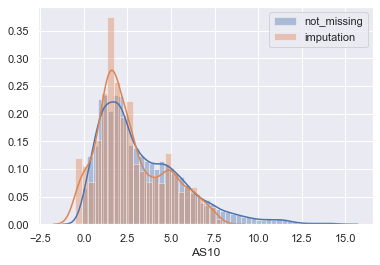

imputation for feature:CA08


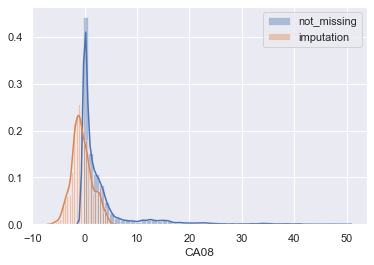

imputation for feature:CP08


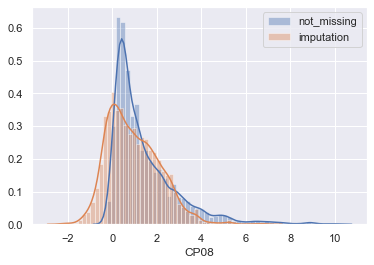

imputation for feature:CP09


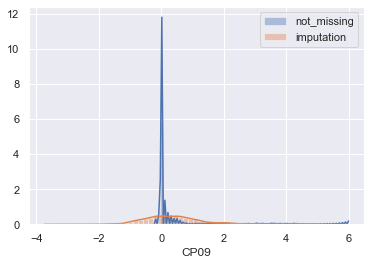

imputation for feature:DVB


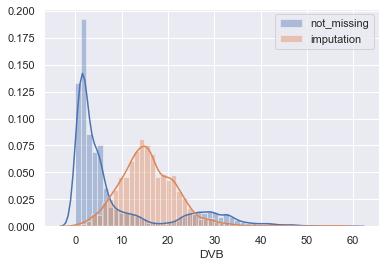

imputation for feature:DX1


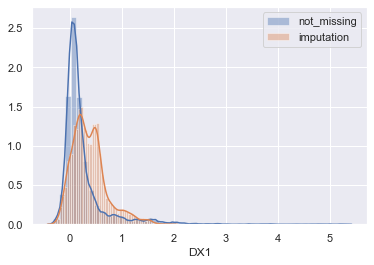

imputation for feature:DX2


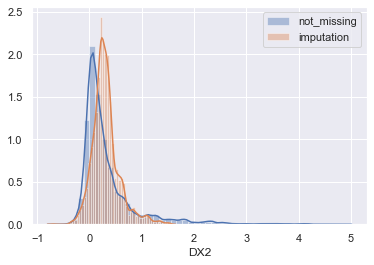

imputation for feature:HOB


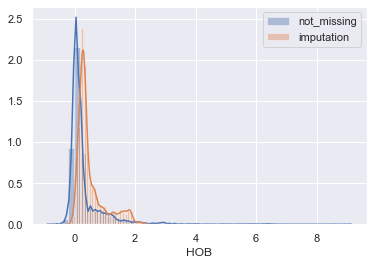

imputation for feature:PCAL


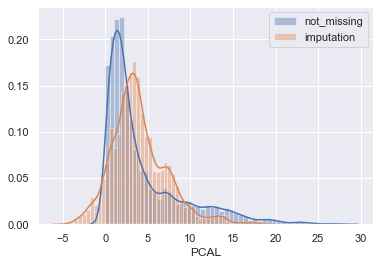

imputation for feature:PCCL


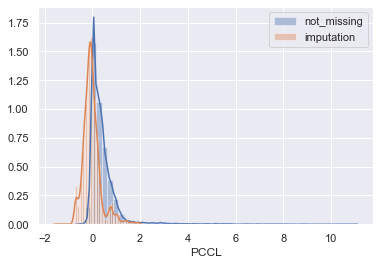

imputation for feature:PGA


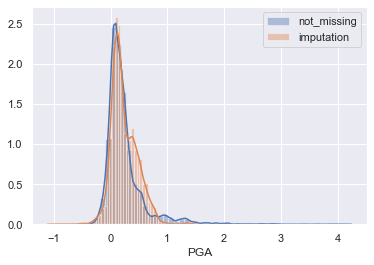

imputation for feature:PHAL


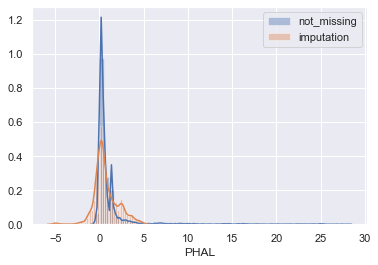

imputation for feature:PHBL


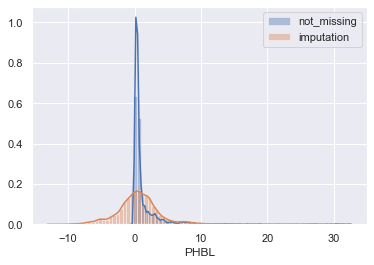

imputation for feature:PVPL


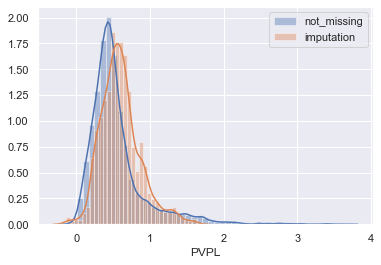

imputation for feature:R1AL


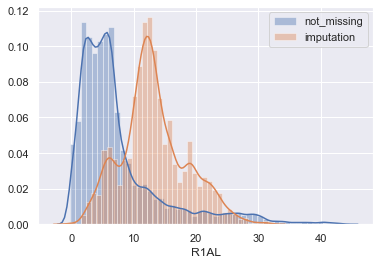

imputation for feature:R1BL


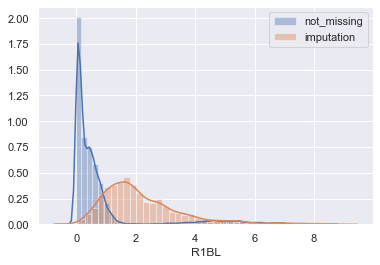

imputation for feature:R2BL


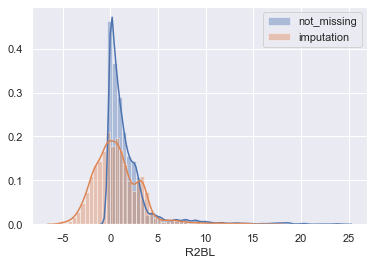

imputation for feature:R8BL


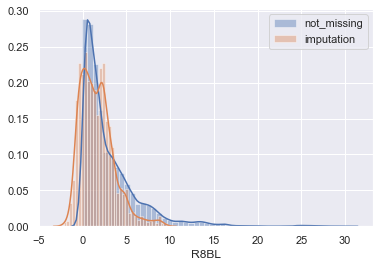

imputation for feature:SPDL


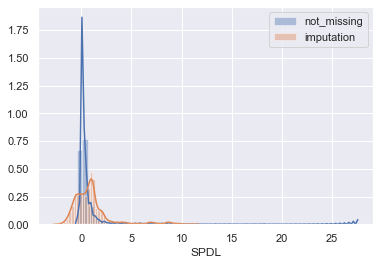

imputation for feature:SPVL


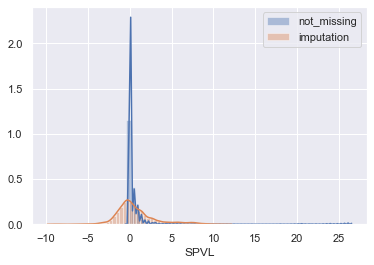

imputation for feature:VD11


In [ ]:
def dfs_all_imputation(dfs,missing_features):
    dfs_full = dfs.dropna(axis = 1)
    for missing_feature in missing_features:
        print('imputation for feature:{}'.format(missing_feature))
        df = merge_df(dfs_full,dfs,missing_feature)
        df,y_pred = df_imputation(df,missing_feature)
        dfs.loc[dfs[missing_feature].isna(),missing_feature] = y_pred
        
    return dfs

dfs_imputation = dfs_all_imputation(dfs,missing_features)

In [ ]:
dfs_imputation

In [ ]:
dfs_imputation.drop(columns=['SPCL', 'DVB', 'CA08', 'CA09',  'PGA', 'PHBL', 'PCAL', 'R1BL', 'R2BL', 'VD13', 'DX1'], inplace=True)

In [ ]:
for i in range(len(data_seizes)):
    if i == 0:
        dfs_imputation[:data_seizes[i]].to_csv('neuron{}.csv'.format(i),index = False)
    else:
        dfs_imputation[data_seizes[i-1]:data_seizes[i-1] + data_seizes[i]].to_csv('neuron{}.csv'.format(i),index = False)

1294